In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv("Hate-2001-2019-0.csv")

In [19]:
#Fill empty values with None for Weapon Type and clean up typos in dataset
df['WeaponType'].fillna('None',inplace = True)
df['WeaponType'].replace('Other ( bottle, rocks, spitting)', 'Other (bottle, rocks, spitting)', inplace=True)
df['WeaponType'].replace('Firearm (unknown whether handgun, rifle or shotgun', 'Firearm (unknown whether handgun, rifle or shotgun)', inplace=True)

#Replace rest of NaN values with 'Unknown'
df_new = df.replace(np.nan, 'Unknown', regex=True)

#rearrange columns to be more easily readable
columns_titles = ['MostSeriousBias','TotalNumberOfVictims','MostSeriousVictimType','TotalNumberOfSuspects','SuspectsRaceAsAGroup','MostSeriousUcr','MostSeriousUcrType','WeaponType','Offensive_Act','MostSeriousLocation','County','NCIC','ClosedYear','MonthOccurrence']
df_new=df_new.reindex(columns=columns_titles)

#One hot encode all necessary columns
#df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousBiasType'], prefix='BiasType')],axis=1)
#df_new.drop(['MostSeriousBiasType'],axis=1, inplace=True)
TotalNumberOfVictims = df_new['TotalNumberOfVictims']
df_new.drop(['TotalNumberOfVictims'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfVictims],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousVictimType'], prefix='VictimType')],axis=1)
df_new.drop(['MostSeriousVictimType'],axis=1, inplace=True)
TotalNumberOfSuspects = df_new['TotalNumberOfSuspects']
df_new.drop(['TotalNumberOfSuspects'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfSuspects],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['SuspectsRaceAsAGroup'], prefix='SuspectsRace')],axis=1)
df_new.drop(['SuspectsRaceAsAGroup'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcr'], prefix='Ucr')],axis=1)
df_new.drop(['MostSeriousUcr'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcrType'], prefix='UcrType')],axis=1)
df_new.drop(['MostSeriousUcrType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['WeaponType'], prefix='Weapon')],axis=1)
df_new.drop(['WeaponType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['Offensive_Act'], prefix='Offense')],axis=1)
df_new.drop(['Offensive_Act'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousLocation'], prefix='Location')],axis=1)
df_new.drop(['MostSeriousLocation'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['County'], prefix='County')],axis=1)
df_new.drop(['County'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['NCIC'], prefix='Agency')],axis=1)
df_new.drop(['NCIC'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['ClosedYear'], prefix='Year')],axis=1)
df_new.drop(['ClosedYear'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MonthOccurrence'], prefix='Month')],axis=1)
df_new.drop(['MonthOccurrence'],axis=1, inplace=True)

In [20]:
#separate data into labels and data points
y_labels = df_new['MostSeriousBias']
x_data = df_new.iloc[:, 1:778]

In [21]:
#split data into training and testing sets and shuffle before splitting
x_Train, x_Test, y_Train, y_Test = train_test_split(x_data, y_labels, shuffle = True, test_size = .2)

In [22]:
#scale the data/normalize the data so that the features do not broadly vary
scaler = StandardScaler()
scaler.fit(x_Train)

x_Train = scaler.transform(x_Train)
x_Test = scaler.transform(x_Test)

In [31]:
#create an empty list to store accuracy values
accuracy1 = []
for n in range(25,525,25):
    print(n)
    #build the Knn classifier
    knnclass = KNeighborsClassifier(n_neighbors=n)
    #train the classifier
    knnclass.fit(x_Train, y_Train)
    #make predictions for testing data by using the classifier
    y_pred = knnclass.predict(x_Test)
    #save the accuracy score for each iteration
    acc = accuracy_score(y_Test, y_pred)
    accuracy1.append(acc)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


Text(0, 0.5, 'Accuracy')

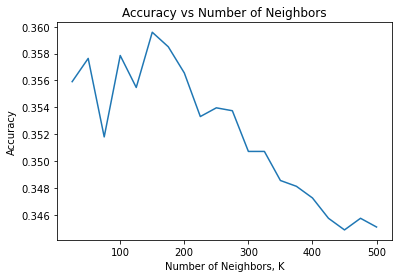

In [32]:
import matplotlib.pyplot as plt
estimators = list(range(25,525,25))
plt.plot(estimators,accuracy1)
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors, K')
plt.ylabel('Accuracy')

In [33]:
np.argmax(accuracy1)
Nvaluemax1 = estimators[np.argmax(accuracy1)]
maxaccuracy1 = accuracy[np.argmax(accuracy1)]
print(Nvaluemax1)
print(maxaccuracy1)

150
0.39463435742102987


In [34]:
#create an empty list to store accuracy values
accuracy2 = []

#create different RF classifiers by changing the n_estimators every iteration
for n in range(25,525,25):
    #Build the Random Forest Classifier
    randFC=RandomForestClassifier(n_estimators=n)

    #train the classifier
    randFC.fit(x_Train,y_Train)
    
    #make predictions for testing data by using classifier
    y_pred=randFC.predict(x_Test)

    #save accuracy of our classifier each iteration
    acc = accuracy_score(y_Test, y_pred)
    accuracy2.append(acc)
    

Text(0, 0.5, 'Accuracy')

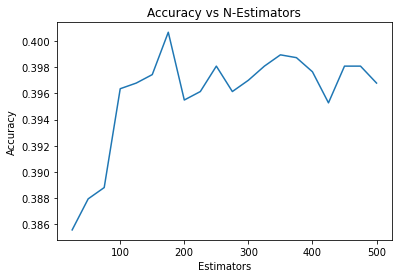

In [35]:
import matplotlib.pyplot as plt
estimators = list(range(25,525,25))
plt.plot(estimators,accuracy2)
plt.title('Accuracy vs N-Estimators')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')

In [36]:
np.argmax(accuracy2)
Nvaluemax2 = estimators[np.argmax(accuracy2)]
maxaccuracy2 = accuracy[np.argmax(accuracy2)]
print(Nvaluemax2)
print(maxaccuracy2)

175
0.3931198615318044


In [37]:
#print out statistics to show how well our classifier did
print(classification_report(y_Test, y_pred))

                                                        precision    recall  f1-score   support

                    Anti-American Indian/Alaska Native       0.00      0.00      0.00         6
                                             Anti-Arab       0.17      0.01      0.03        68
                                            Anti-Asian       0.21      0.03      0.06       173
                                         Anti-Bisexual       0.00      0.00      0.00         8
                        Anti-Black or African American       0.42      0.81      0.56      1416
                                         Anti-Catholic       0.32      0.29      0.30        35
                               Anti-Citizenship Status       0.00      0.00      0.00        10
                                           Anti-Female       1.00      0.22      0.36         9
                                       Anti-Gay (Male)       0.33      0.26      0.29       617
                             Anti-Gende

/Users/danatajiri/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
